### Compare performance of PRedictive Models

In [1]:
import time
from datetime import timedelta

start_time = time.time()

In [2]:
import pandas            as  pd
import numpy             as  np
import seaborn           as  sns
import matplotlib.pyplot as  plt
import statsmodels.api   as  sm
import sys, os

print("\nCurrent working directory %s" %os.getcwd())

os.chdir(r'D:\DrPKV\20220713')


Current working directory D:\DrPKV\20220713


In [3]:
"""
  Function Name: compare_models

  Description: This **function** compares various algorithms on 
                 1) AUROC 2) Precision, 3) Recall
   
  Input:  1) splits for k fold 
          2) random seed number
          3) Training data for predictor variables
          4) Training data for target variable

   Output: Model comparison on these metrics 1) AUROC 2) Metrics - Precision, Recall
   
"""

def compare_models(n_splits, random_state, X, Y):  

    ### To compare algorithms
    
    import  matplotlib.pyplot              as       plt
    from    sklearn.model_selection        import   KFold
    from    sklearn.model_selection        import   RepeatedStratifiedKFold
    from    sklearn.model_selection        import   cross_val_score
    from    sklearn.linear_model           import   LogisticRegression
    from    sklearn.tree                   import   DecisionTreeClassifier
    from    sklearn.neighbors              import   KNeighborsClassifier
    from    sklearn.naive_bayes            import   GaussianNB
    from    sklearn.ensemble               import   RandomForestClassifier
    from    xgboost                        import   XGBClassifier
    from    sklearn.discriminant_analysis  import   LinearDiscriminantAnalysis as LDA
    from    sklearn.svm                    import   SVC

    ### Prepare models
    
    models  = []

    models.append(('CART', DecisionTreeClassifier()))
    models.append(('RF',   RandomForestClassifier()))
    models.append(('XGB',  XGBClassifier()))
    models.append(('LR',   LogisticRegression()))
    models.append(('KNN',  KNeighborsClassifier()))
    models.append(('LDA',  LDA()))
    models.append(('SVM',  SVC(gamma = 'auto', kernel = 'rbf')))
    models.append(('NB',   GaussianNB()))

   
    ### Evaluate model in turn
    
    scores_req             =     ['roc_auc', 'precision', 'recall']
    
    for i in range(len(scores_req)):

        results                =     []
        names                  =     []
        
        scoring                =     scores_req[i]
        
        print(scoring)
        
        for name, model in models:
                print("\n n_splits %d random_state %d" % (n_splits, random_state))        	
                #kfold           =   KFold(n_splits = 10, random_state = 12345)
                rskf            =   RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=36851234)
                cv_results      =   cross_val_score(model, X, Y, cv = rskf, scoring = scoring)
                results.append(cv_results)
                names.append(name)
                msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
                print(msg)
        
        ### Box plot algorithm comparison
        
        sub_title = 'Algorithm Comparison using ' + scoring
        
        fig = plt.figure()
        fig.suptitle(sub_title)
        ax  = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.show()

### ------------------------------------------------------------------------------------------

In [4]:
file_name  =  r'.\Output\imputed_compact_dataset_ten_20220713084509AM.csv'
dff        =  pd.read_csv(file_name)

In [5]:
dff.columns

Index(['Target', 'Cash_ratio', 'Changeinsales_Industry', 'debt_equity',
       'debt_income', 'Interest_coverage', 'Quick_ratio', 'ROE(new)',
       'ROS(new)', 'Sales_CE', 'Total shareholders' funds', 'Slno',
       'Shareholderquity_code'],
      dtype='object')

In [6]:
reqd_cols   =   ['Target', 'Cash_ratio', 'Changeinsales_Industry', 'debt_equity', 'debt_income', 'Interest_coverage',\
                 'Quick_ratio', 'ROE(new)', 'ROS(new)', 'Sales_CE', "Total shareholders' funds", 'Slno','Shareholderquity_code']
df1         =   dff[reqd_cols]

In [7]:
df1.columns

Index(['Target', 'Cash_ratio', 'Changeinsales_Industry', 'debt_equity',
       'debt_income', 'Interest_coverage', 'Quick_ratio', 'ROE(new)',
       'ROS(new)', 'Sales_CE', 'Total shareholders' funds', 'Slno',
       'Shareholderquity_code'],
      dtype='object')

In [8]:
# define dataset
Y             =    df1['Target']
X             =    df1.drop(['Target', 'Slno','Shareholderquity_code'], axis = 1)                       
print('X dimension {}'. format(X.shape))
print('y dimension {}'. format(Y.shape))

X dimension (9000, 10)
y dimension (9000,)


roc_auc

 n_splits 10 random_state 12345
CART: 0.737218 (0.005260)

 n_splits 10 random_state 12345
RF: 0.919661 (0.006400)

 n_splits 10 random_state 12345
XGB: 0.930577 (0.005118)

 n_splits 10 random_state 12345
LR: 0.667682 (0.014767)

 n_splits 10 random_state 12345
KNN: 0.655559 (0.002649)

 n_splits 10 random_state 12345
LDA: 0.682646 (0.006317)

 n_splits 10 random_state 12345
SVM: 0.581054 (0.002108)

 n_splits 10 random_state 12345
NB: 0.552761 (0.023633)


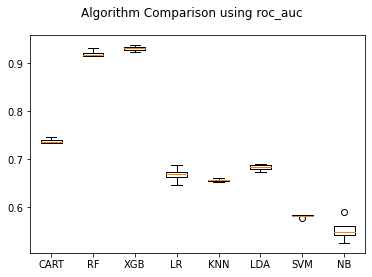

precision

 n_splits 10 random_state 12345
CART: 0.531923 (0.016886)

 n_splits 10 random_state 12345
RF: 0.889759 (0.016111)

 n_splits 10 random_state 12345
XGB: 0.822970 (0.010718)

 n_splits 10 random_state 12345
LR: 0.296134 (0.028905)

 n_splits 10 random_state 12345
KNN: 0.590805 (0.023060)

 n_splits 10 random_state 12345
LDA: 0.622711 (0.070792)

 n_splits 10 random_state 12345
SVM: 0.959302 (0.025342)

 n_splits 10 random_state 12345
NB: 0.078544 (0.078557)


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


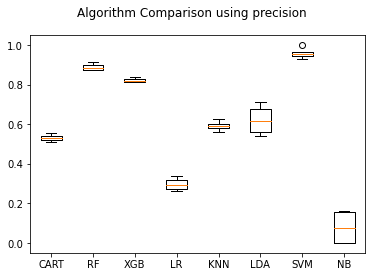

recall

 n_splits 10 random_state 12345
CART: 0.555471 (0.007123)

 n_splits 10 random_state 12345
RF: 0.474725 (0.012864)

 n_splits 10 random_state 12345
XGB: 0.557742 (0.020799)

 n_splits 10 random_state 12345
LR: 0.191692 (0.016004)

 n_splits 10 random_state 12345
KNN: 0.229814 (0.004193)

 n_splits 10 random_state 12345
LDA: 0.010564 (0.004647)

 n_splits 10 random_state 12345
SVM: 0.061510 (0.000681)

 n_splits 10 random_state 12345
NB: 0.447927 (0.447947)


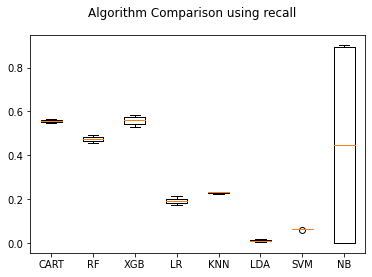

In [9]:
n_splits     =    10
random_state =    12345

compare_models(n_splits, random_state, X, Y)

In [10]:
elapsed_time_secs = time.time() - start_time

elapsed_time_msg = "All models - Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(elapsed_time_secs))

print(elapsed_time_msg)   

All models - Execution took: 0:01:10 secs (Wall clock time)


### END